# How does each athlete attack the different phases of a 400 hurdle race?

## Read and Clean Data

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
sns.set_theme(style='ticks')

# Separating and Reading Data

xlsx = pd.ExcelFile('Track_Project.xlsx')
df_warholm_s = pd.read_excel(xlsx, sheet_name='W_Splits')
df_benjamin_s = pd.read_excel(xlsx, sheet_name='B_Splits')
df_dossantos_s = pd.read_excel(xlsx, sheet_name='DS_Splits')
df_warholm_c = pd.read_excel(xlsx, sheet_name='W_Cumulative')
df_benjamin_c = pd.read_excel(xlsx, sheet_name='B_Cumulative')
df_dossantos_c = pd.read_excel(xlsx, sheet_name='DS_Cumulative')

df_w_splits = df_warholm_s.copy().assign(Athlete='Warholm')
df_b_splits = df_benjamin_s.copy().assign(Athlete='Benjamin')
df_ds_splits = df_dossantos_s.copy().assign(Athlete='dos Santos')
df_splits = pd.concat([df_w_splits,df_b_splits,df_ds_splits],axis=0)
df_splits = df_splits.sort_values(by='Time')

# Setting Up 

athlete_order = ['Warholm','Benjamin','dos Santos']

all_columns = ['H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','Run in']
start_phase_columns = ['H1','H2','H3','H4']
mid_phase_columns = ['H5','H6','H7']
end_phase_columns = ['H8','H9','H10','Run in']
df_splits['Start_Phase'] = df_splits[start_phase_columns].mean(axis=1)
df_splits['Mid_Phase'] = df_splits[mid_phase_columns].mean(axis=1)
df_splits['End_Phase'] = df_splits[end_phase_columns].mean(axis=1)

## General Phases Average Times by Athlete

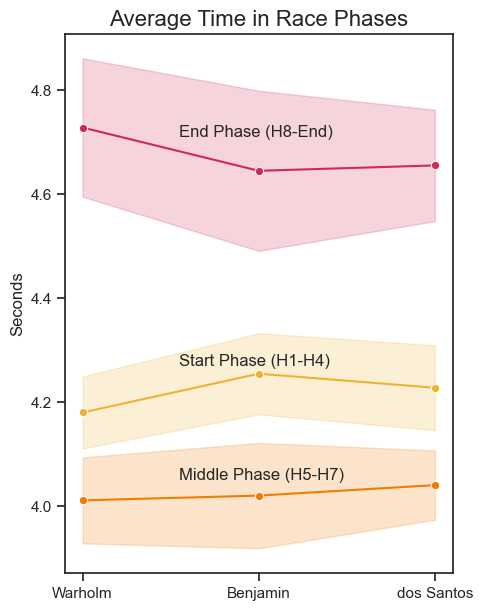

In [2]:
fig, ax = plt.subplots(figsize=([5,7]))
sns.set_theme(style='ticks')
sns.lineplot(data=df_splits,x='Athlete',y='Start_Phase', errorbar='sd',marker='o',color="#ebb433")
sns.lineplot(data=df_splits,x='Athlete',y='Mid_Phase', errorbar='sd',marker='o',color="#f17c00")
sns.lineplot(data=df_splits,x='Athlete',y='End_Phase', errorbar='sd',marker='o',color="#d12953")
plt.ylabel('Seconds')
plt.xlabel('')
plt.title('Average Time in Race Phases',fontsize=16)
plt.text(0.55,4.269,'Start Phase (H1-H4)', fontsize=12)
plt.text(0.55,4.05,'Middle Phase (H5-H7)', fontsize=12)
plt.text(0.55,4.71,'End Phase (H8-End)', fontsize=12)
plt.show()

## Phases Average Times by Race Round (Heat vs. Semi vs. Final)

In [3]:
df_splits_finals = df_splits[df_splits['Type']=='final']
df_splits_semis = df_splits[df_splits['Type']=='semi']
df_splits_heats = df_splits[df_splits['Type']=='heat']
df_splits_heats = df_splits_heats.reset_index()
df_splits_heats = df_splits_heats.reindex([0,2, 1, 3,4,5,6,7,8,9,10,11,12,13,14,15])

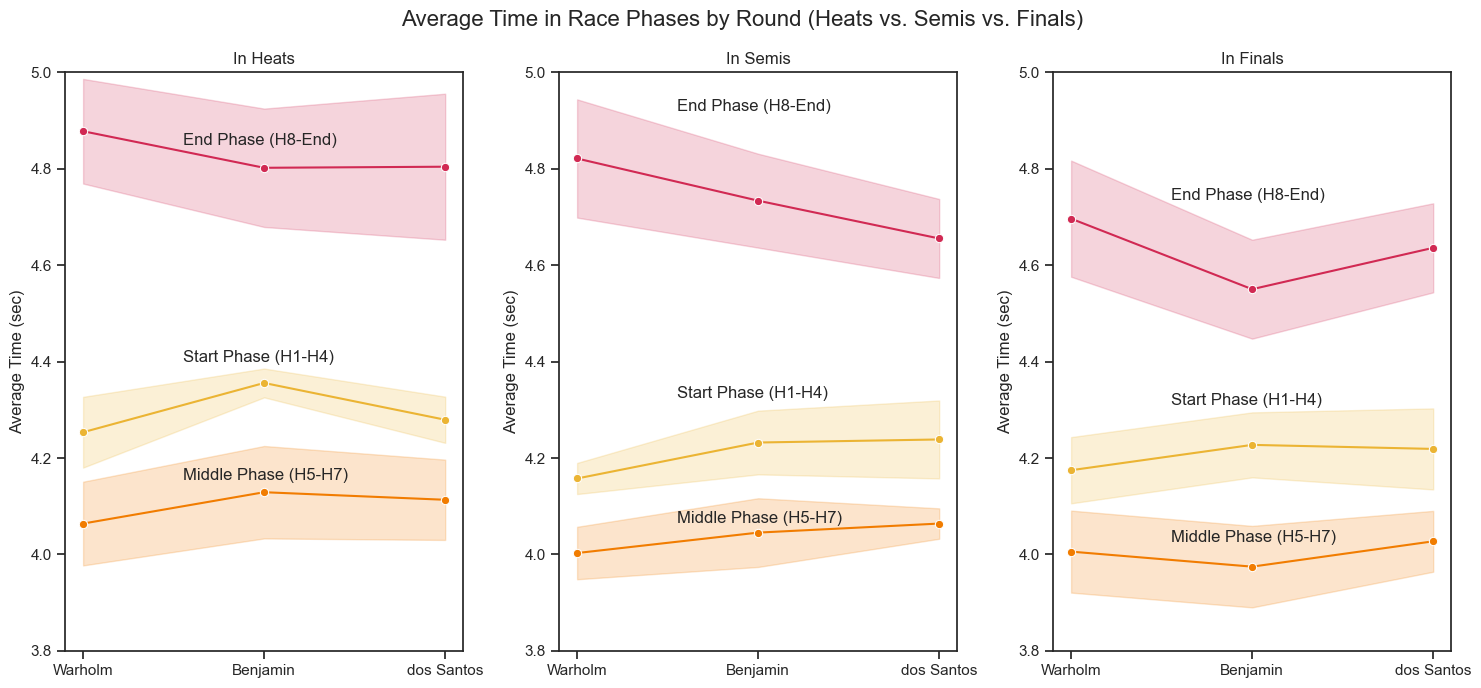

In [4]:
fig, ax = plt.subplots(1,3,figsize=([15,7]))
sns.set_theme(style='ticks')
sns.lineplot(data=df_splits_heats,x='Athlete',y='Start_Phase', errorbar='sd',marker='o',ax=ax[0],color="#ebb433")
sns.lineplot(data=df_splits_heats,x='Athlete',y='Mid_Phase', errorbar='sd',marker='o',ax=ax[0],color="#f17c00")
sns.lineplot(data=df_splits_heats,x='Athlete',y='End_Phase', errorbar='sd',marker='o',ax=ax[0],color="#d12953")
ax[0].set_ylabel('Average Time (sec)')
ax[0].set_xlabel('')
ax[0].text(0.55,4.4,'Start Phase (H1-H4)', fontsize=12)
ax[0].text(0.55,4.155,'Middle Phase (H5-H7)', fontsize=12)
ax[0].text(0.55,4.85,'End Phase (H8-End)', fontsize=12)
ax[0].set_title('In Heats')
ax[0].set_ylim(3.8,5)
sns.lineplot(data=df_splits_semis,x='Athlete',y='Start_Phase', errorbar='sd',marker='o',ax=ax[1],color="#ebb433")
sns.lineplot(data=df_splits_semis,x='Athlete',y='Mid_Phase', errorbar='sd',marker='o',ax=ax[1],color="#f17c00")
sns.lineplot(data=df_splits_semis,x='Athlete',y='End_Phase', errorbar='sd',marker='o',ax=ax[1],color="#d12953")
ax[1].set_ylabel('Average Time (sec)')
ax[1].set_xlabel('')
ax[1].text(0.55,4.325,'Start Phase (H1-H4)', fontsize=12)
ax[1].text(0.55,4.065,'Middle Phase (H5-H7)', fontsize=12)
ax[1].text(0.55,4.92,'End Phase (H8-End)', fontsize=12)
ax[1].set_title('In Semis')
ax[1].set_ylim(3.8,5)
sns.lineplot(data=df_splits_finals,x='Athlete',y='Start_Phase', errorbar='sd',marker='o',ax=ax[2],color="#ebb433")
sns.lineplot(data=df_splits_finals,x='Athlete',y='Mid_Phase', errorbar='sd',marker='o',ax=ax[2],color="#f17c00")
sns.lineplot(data=df_splits_finals,x='Athlete',y='End_Phase', errorbar='sd',marker='o',ax=ax[2],color="#d12953")
ax[2].set_ylabel('Average Time (sec)')
ax[2].set_xlabel('')
ax[2].text(0.55,4.31,'Start Phase (H1-H4)', fontsize=12)
ax[2].text(0.55,4.025,'Middle Phase (H5-H7)', fontsize=12)
ax[2].text(0.55,4.735,'End Phase (H8-End)', fontsize=12)
ax[2].set_title('In Finals')
ax[2].set_ylim(3.8,5)
plt.suptitle('Average Time in Race Phases by Round (Heats vs. Semis vs. Finals)',fontsize=16)
fig.tight_layout()
plt.show()

## Phases Time Variance

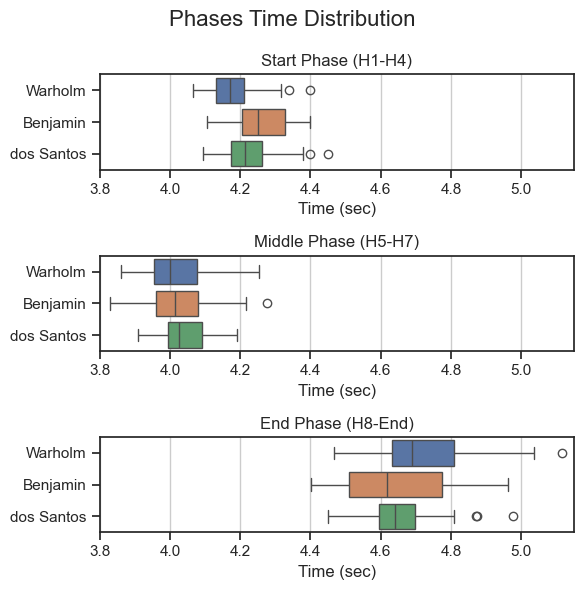

In [6]:
fig, ax = plt.subplots(3,figsize=(6,6))
sns.boxplot(data=df_splits,x='Start_Phase',y='Athlete',ax=ax[0],hue='Athlete')
ax[0].set_ylabel('')
ax[0].set_xlabel('Time (sec)')
ax[0].set_title('Start Phase (H1-H4)')
ax[0].set_xlim(3.8,5.15)
ax[0].grid('on',axis='x')
sns.boxplot(data=df_splits,x='Mid_Phase',y='Athlete',ax=ax[1],hue='Athlete')
ax[1].set_ylabel('')
ax[1].set_xlabel('Time (sec)')
ax[1].set_title('Middle Phase (H5-H7)')
ax[1].set_xlim(3.8,5.15)
ax[1].grid('on',axis='x')
sns.boxplot(data=df_splits,x='End_Phase',y='Athlete',ax=ax[2],hue='Athlete')
ax[2].set_ylabel('')
ax[2].set_xlabel('Time (sec)')
ax[2].set_title('End Phase (H8-End)')
ax[2].set_xlim(3.8,5.15)
ax[2].grid('on',axis='x')
fig.suptitle('Phases Time Distribution',fontsize=16)
fig.tight_layout()

# Warholm is by far the most explosive starter and also the most consistent, while Benjamin is the slowest
# Very even in middle phase but dos Santos is most consistent while Warholm is generally the fastest
# Benjamin takes the win in the end, dos Santos close behind with a few outliers, Warholm closes slowest with one outlier being injury